# LBPH Face Recognition Experiments

This notebook evaluates the robustness of an LBPH-based face recognition system under real-world variations including lighting, pose, and partial occlusion.


## IMPORTS (Code)

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Dataset
This experiment uses publicly available face datasets (e.g., AT&T Face Dataset) to evaluate recognition performance under controlled and varied conditions.


## DATALOADING
Placeholder for loading images and labels
Images should be converted to grayscale before training

In [2]:
#DATASET_PATH = "att_faces"  # folder containing s1, s2, ..., s40
DATASET_PATH = "C:/Users/Rahul/downloads/att_faces"

images = []
labels = []

for subject_dir in os.listdir(DATASET_PATH):
    subject_path = os.path.join(DATASET_PATH, subject_dir)
    
    if not os.path.isdir(subject_path):
        continue
        
    label = int(subject_dir.replace("s", ""))
    
    for image_name in os.listdir(subject_path):
        image_path = os.path.join(subject_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            continue
            
        image = cv2.resize(image, (200, 200))
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images")


Loaded 400 images


## Model Training (Code)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
recognizer = cv2.face.LBPHFaceRecognizer_create(
    radius=1,
    neighbors=8,
    grid_x=8,
    grid_y=8
)

recognizer.train(X_train, y_train)
print("LBPH model trained successfully")

Training samples: 320
Testing samples: 80
LBPH model trained successfully


## Evaluation Metrics
The model is evaluated using accuracy, confusion matrix, and false positive / false negative analysis.

Accuracy: 0.975


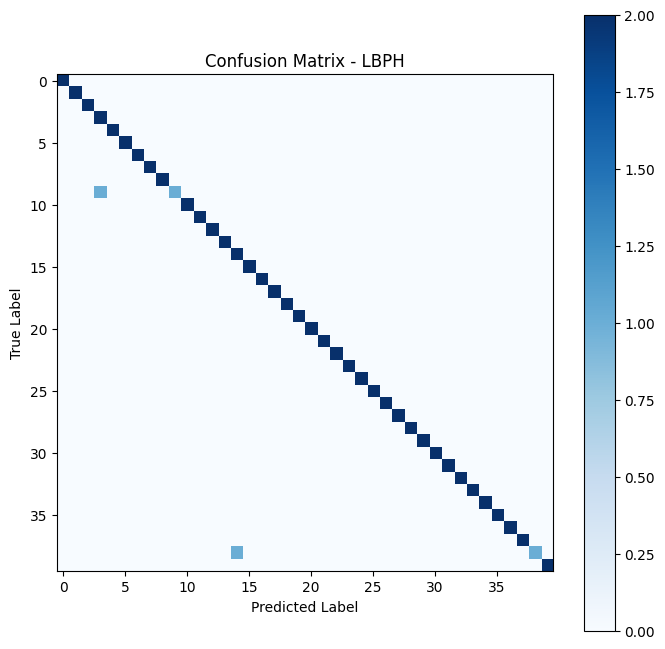

In [5]:
y_pred = []

for img in X_test:
    label, confidence = recognizer.predict(img)
    y_pred.append(label)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - LBPH")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()


## Error Analysis

False positives were analyzed carefully due to their higher impact on user trust in attendance systems.
Misclassifications were more frequent under variations in illumination and partial occlusion, highlighting the sensitivity of classical LBPH models to real-world conditions.


## Human-Centered Impact

In attendance systems, false positives may incorrectly mark presence, while false negatives may unfairly penalize users.
These errors affect trust, perceived fairness, and acceptance of automated recognition systems.


## Observations

The LBPH-based face recognition system performs adequately under controlled conditions but shows reduced robustness under environmental variations.
These findings motivate comparison with deep-learning-based approaches to improve reliability and ethical deployment.
